# Predicting Wine Quality

## Physico-chemical properties that affect the quality of red and white variants of the "Vinho Verde" wine

Samples of red and white variants of the _Vinho Verde_ wine was rated for quality by wine experts through different physicochemical tests. This data is sourced from [UCI](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Vinho Verde is an affordable, fizzy wine that's great for the summer. There are red and white variants of this wine. Yes, it is cheap, but perhaps one variant is of higher quality and will give you a semblance of fine dining for the days when you feel like a character in a James Bond movie?

This analysis will use the available data to answer the following questions:
1. Is a certain variant associated with higher quality?
2. What properties are most important in predicting the quality of wine?
    * Do wines with higher alcohol receive better ratings?
    * Do sweeter wines have better quality ratings?
    * Is acidity level associated with quality?

In [12]:
import pandas as pd
%matplotlib inline

# import local files with r, then the complete filepath in ''
# take note of seperators -- it is not always a comma!
# df_red is the dataframe containing the red wine dataset

df_red = pd.read_csv(r'C:\Users\Itunuoluwa\jyptr notebooks\WineQuality analysis\winequality-red.csv', sep = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# df_white is the dataframe containing the white wine dataset

df_white = pd.read_csv(r'C:\Users\Itunuoluwa\jyptr notebooks\WineQuality analysis\winequality-white.csv', sep = ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Both datasets were wrangled to know its **dimensions**, check for **unique** values, and errors such as **null** values, inconsistent **data types**, and **duplicate** rows.
*NB: The number of rows is the number of **observations** and the number of columns is the number of **variables***
First, the red wine dataset

In [68]:
# dimensions, datatypes, null values in red wine dataset
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_variant          1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
# Duplicates in red wine dataset

dup = sum(df_red.duplicated())
print('There are', dup, 'duplicate rows in the red wine dataset')

There are 240 duplicate rows in the red wine dataset


In [16]:
# Unique quality ratings in the red wine dataset

unq = df_red['quality'].nunique()
print('There are', unq, 'unique ratings in the red wine dataset')

There are 6 unique ratings in the red wine dataset


Second, the white wine dataset

In [69]:
# dimensions, datatypes, null values in white wine dataset
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_variant          4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
# Duplicates in white wine dataset

dup = sum(df_white.duplicated())
print('There are', dup, 'duplicate rows in the white wine dataset')

There are 937 duplicate rows in the white wine dataset


In [19]:
# Unique quality ratings in the white wine dataset

unq = df_white['quality'].nunique()
print('There are', unq, 'unique ratings in the white wine dataset')

There are 7 unique ratings in the white wine dataset


While there are duplicates in both datasets, they may not need to be removed due to context. These are values gotten from samples and some samples might have similar readings.
The two datasets have the same number of columns and can be combined into one dataframe without creating null values. This new dataframe will have a new column for the wine variant (red or white).
The *numpy* package will also need to be imported

In [58]:
# import numpy
import numpy as np

# create color array for red dataframe for all 1599 observations
red_wine = np.repeat('red', 1599)

# create color array for white dataframe
white_wine = np.repeat('white', 4898)

In [59]:
# add array to the red wine dataframe under the column 'color'
df_red['wine_variant'] = red_wine
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_variant
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [61]:
# add aray to the white wine dataframe under the same column 'color'
df_white['wine_variant'] = white_wine
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_variant
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [62]:
# Create a new dataframe with both existing ones
wine_df = df_red.append(df_white, ignore_index=True, sort=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               6497 non-null   float64
 1   chlorides             6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   density               6497 non-null   float64
 4   fixed acidity         6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   pH                    6497 non-null   float64
 7   quality               6497 non-null   int64  
 8   residual sugar        6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  total sulfur dioxide  6497 non-null   float64
 11  volatile acidity      6497 non-null   float64
 12  wine_variant          6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


This new dataframe was saved as a shareable CSV file so that others can use the merged file directly.

In [24]:
# save the dataframe
wine_df.to_csv('winequality_merged.csv', index=False)

The plots below show the distribution of the alcohol, sugar, and acidic content of the red and white variants *Vinho Verde* wine

Text(0.5, 0, 'Alcohol')

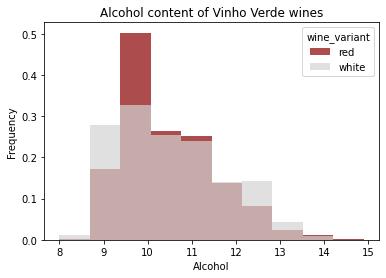

In [229]:
# for color coding
wine_variant = wine_df.pivot(columns='wine_variant', values='alcohol')

# alcohol distribution
fig = wine_variant.plot(kind = 'hist', 
                        density = True, color=['DarkRed', 'LightGray'], alpha = 0.7,
                        title = 'Alcohol content of Vinho Verde wines')
fig.set_xlabel('Alcohol')

Text(0.5, 0, 'Residual Sugar')

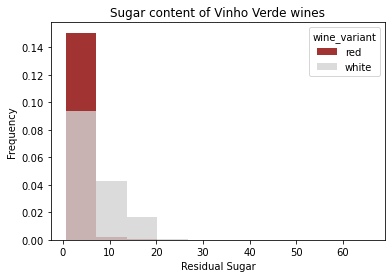

In [108]:
# for color coding
wine_variant = wine_df.pivot(columns='wine_variant', values='residual sugar')

# residual sugar distribution
fig = wine_variant.plot(kind = 'hist', 
                        density = True, color=['DarkRed', 'LightGray'], alpha = 0.8,
                        title = 'Sugar content of Vinho Verde wines')
fig.set_xlabel('Residual Sugar')

Text(0.5, 0, 'pH')

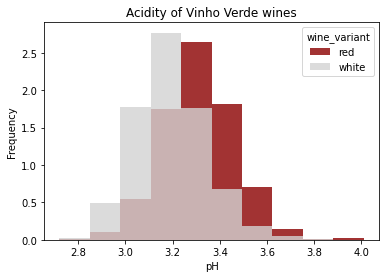

In [155]:
# for color coding
wine_variant = wine_df.pivot(columns='wine_variant', values='pH')

# fixed acidity distribution
fig = wine_variant.plot(kind = 'hist',
                        density = True, color=['DarkRed', 'LightGray'], alpha = 0.8,
                        title = 'Acidity of Vinho Verde wines')
fig.set_xlabel('pH')

The relationships between the quality ratings and the alcohol, sugar, and acidic content are also shown below.

<AxesSubplot:title={'center':'Quality against Alcohol'}, xlabel='alcohol', ylabel='quality'>

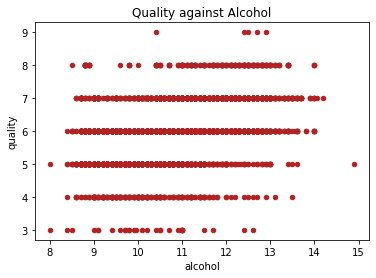

In [112]:
#Quality vs Alcohol

wine_df.plot('alcohol', 'quality', kind = 'scatter',
            c='Firebrick', title = 'Quality against Alcohol')

<AxesSubplot:title={'center':'Quality against Residual Sugar'}, xlabel='residual sugar', ylabel='quality'>

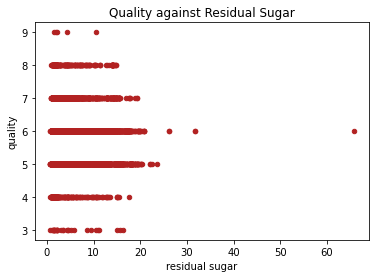

In [113]:
#Quality vs Residual Sugar

wine_df.plot('residual sugar', 'quality', kind = 'scatter',
             c= 'Firebrick', title = 'Quality against Residual Sugar')

<AxesSubplot:title={'center':'Quality against pH'}, xlabel='pH', ylabel='quality'>

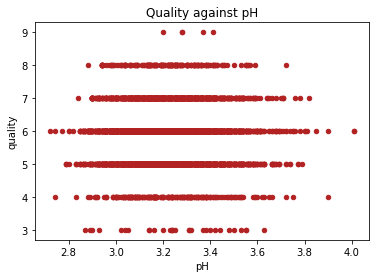

In [114]:
#Quality vs pH

wine_df.plot('pH', 'quality', kind = 'scatter',
            c='Firebrick', title = 'Quality against pH')

In [74]:
# summary statistics grouped by wine variant
wine_df.groupby('wine_variant').mean()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
wine_variant,,,,,,,,,,,,
red,10.422983,0.087467,0.270976,0.996747,8.319637,15.874922,3.311113,5.636023,2.538806,0.658149,46.467792,0.527821
white,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,5.877909,6.391415,0.489847,138.360657,0.278241


In [93]:
# summary statistics grouped by quality and wine variant
wine_df.groupby(['quality','wine_variant']).mean()

alcohol  chlorides  citric acid   density  \
quality wine_variant                                                
3       red            9.955000   0.122500     0.171000  0.997464   
        white         10.345000   0.054300     0.336000  0.994884   
4       red           10.265094   0.090679     0.174151  0.996542   
        white         10.152454   0.050098     0.304233  0.994277   
5       red            9.899706   0.092736     0.243686  0.997104   
        white          9.808840   0.051546     0.337653  0.995263   
6       red           10.629519   0.084956     0.273824  0.996615   
        white         10.575372   0.045217     0.338025  0.993961   
7       red           11.465913   0.076588     0.375176  0.996104   
        white         11.367936   0.038191     0.325625  0.992452   
8       red           12.094444   0.068444     0.391111  0.995212   
        white         11.636000   0.038314     0.326514  0.992236   
9       white         12.180000   0.027400     0.386000  0.991460   

                      fixed acidity  free sulfur dioxide        pH  \
quality wine_variant                                                 
3       red                8.360000            11.000000  3.398000   
        white              7.600000            53.325000  3.187500   
4       red                7.779245            12.264151  3.381509   
        white              7.129448            23.358896  3.182883   
5       red                8.167254            16.983847  3.304949   
        white              6.933974            36.432052  3.168833   
6       red                8.347179            15.711599  3.318072   
        white              6.837671            35.650591  3.188599   
7       red                8.872362            14.045226  3.290754   
        white              6.734716            34.125568  3.213898   
8       red                8.566667            13.277778  3.267222   
        white              6.657143            36.720000  3.218686   
9       white              7.420000            33.400000  3.308000   

                      residual sugar  sulphates  total sulfur dioxide  \
quality wine_variant                                                    
3       red                 2.635000   0.570000             24.900000   
        white               6.392500   0.474500            170.600000   
4       red                 2.694340   0.596415             36.245283   
        white               4.628221   0.476135            125.279141   
5       red                 2.528855   0.620969             56.513950   
        white               7.334969   0.482203            150.904598   
6       red                 2.477194   0.675329             40.869906   
        white               6.441606   0.491106            137.047316   
7       red                 2.720603   0.741256             35.020101   
        white               5.186477   0.503102            125.114773   
8       red                 2.577778   0.767778             33.444444   
        white               5.671429   0.486229            126.165714   
9       white               4.120000   0.466000            116.000000   

                      volatile acidity  
quality wine_variant                    
3       red                   0.884500  
        white                 0.333250  
4       red                   0.693962  
        white                 0.381227  
5       red                   0.577041  
        white                 0.302011  
6       red                   0.497484  
        white                 0.260564  
7       red                   0.403920  
        white                 0.262767  
8       red                   0.423333  
        white                 0.277400  
9       white                 0.298000

In [94]:
# summary statistics grouped by quality and wine variant, showing only alcohol content
wine_df.groupby(['quality','wine_variant'])['alcohol'].mean()

quality  wine_variant
3        red              9.955000
         white           10.345000
4        red             10.265094
         white           10.152454
5        red              9.899706
         white            9.808840
6        red             10.629519
         white           10.575372
7        red             11.465913
         white           11.367936
8        red             12.094444
         white           11.636000
9        white           12.180000
Name: alcohol, dtype: float64

Text(0, 0.5, 'Average quality')

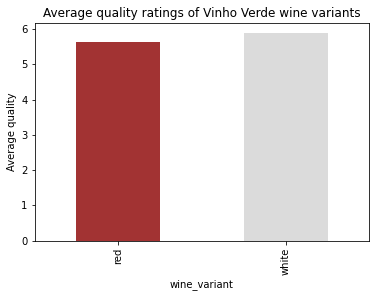

In [126]:
# is a certain type of wine associated with higher quality?

mean_qlty = wine_df.groupby('wine_variant')['quality'].mean()

# plot a bar chart of the results
ans = mean_qlty.plot(kind='bar', color=['DarkRed', 'LightGray'], alpha = 0.8,
                    title='Average quality ratings of Vinho Verde wine variants')
ans.set_ylabel('Average quality')

In [115]:
# what level of acidity receives the highest average rating?

wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [118]:
# use pandas.cut to change the pH continuos variable into categorica variables using evenly spaced quartiles
# Quartiles from min to max

quartiles = [2.72,3.11,3.21,3.32,4.01]

# Labels from pH values at quartiles
labels = ['High', 'Moderately High', 'Medium', 'Low']

In [119]:
# create acidity_level column
wine_df['acidity_level'] = pd.cut(wine_df['pH'], quartiles, labels=labels)

In [224]:
wine_df.groupby(['acidity_level','wine_variant'])['pH'].mean()

acidity_level    wine_variant
High             red             3.035455
                 white           3.028482
Moderately High  red             3.170783
                 white           3.163605
Medium           red             3.273860
                 white           3.264298
Low              red             3.441380
                 white           3.426366
Name: pH, dtype: float64

Text(0.5, 0, 'Average quality rating')

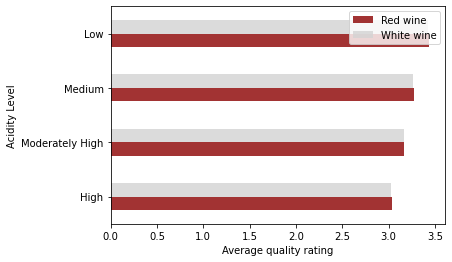

In [225]:
#show plot of mean quality of acidity level
mean_rating = pd.DataFrame([['High', 3.035455, 3.028482],['Moderately High', 3.1701783, 3.163605],
                ['Medium', 3.273860, 3.264298],['Low', 3.441380, 3.426366]], columns=['Acidity Level','Red wine', 'White wine'])

fig=mean_rating.plot(x='Acidity Level', kind='barh', color=['DarkRed','LightGray'], alpha=0.8)
fig.set_xlabel('Average quality rating')

In [230]:
#median amount of alcohol
wine_df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [231]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query ('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query ('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

<AxesSubplot:ylabel='Frequency'>

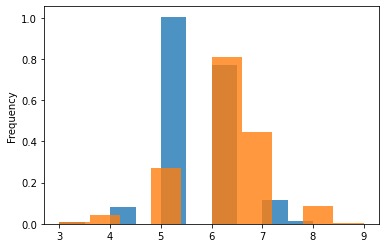

In [232]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol['quality'].plot(kind='hist',density=True,alpha=0.8)
high_alcohol['quality'].plot(kind='hist', density=True,alpha=0.8)

In [234]:
# get the median amount of residual sugar
wine_df['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [242]:
wine_df.rename(columns={'residual sugar':'residual_sugar'},inplace=True)
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar <3')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >=3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

5.82782874617737

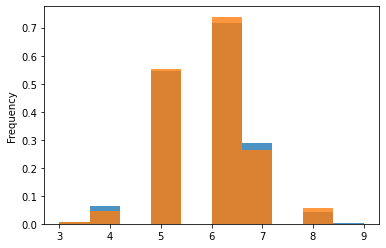

In [243]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar['quality'].plot(kind='hist',density=True,alpha=0.8)
high_sugar['quality'].plot(kind='hist', density=True,alpha=0.8)

low_sugar['quality'].mean()
high_sugar['quality'].mean()